In [33]:
from typing import Mapping, Literal

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_rel, shapiro, wilcoxon

In [34]:
def plot_boxplots(
    results: Mapping[str, pd.DataFrame],
    metric: Literal["AUC", "U1", "p", "MAD"],
):
    plt.figure(figsize=(10, 6))
    plt.boxplot(
        [results[key][metric] for key in results], tick_labels=results.keys()
    )
    plt.ylabel(metric)
    plt.xlabel("Methods")
    plt.title(f"Boxplots of {metric} by Method")
    plt.show()

In [35]:
def calculate_results_statistics(
    results: Mapping[str, pd.DataFrame],
    metric: Literal["AUC", "U1", "p", "MAD"],
):
    for method, method_results in results.items():
        print("=== " + method + " ===")
        mean = round(method_results[metric].mean(), 3)
        std = round(method_results[metric].std(), 3)
        print(f"{metric}: {mean} +- {std}")

In [36]:
def is_stat_sign(results, method1, method2, metric):
    differences = results[method1][metric] - results[method2][metric]
    _, p_val_shapiro = shapiro(differences)
    is_normal_dist = p_val_shapiro > 0.05
    
    significance_test = ttest_rel if is_normal_dist else wilcoxon
    _, p_val_sign = significance_test(results[method1][metric], results[method2][metric])
    is_stat_sign = p_val_sign < 0.05 
    result = "Significant" if is_stat_sign else "Unsignificant"
    
    print("=== " + method1 + " vs " + method2 + " ===")
    print(result + ", p_value: " + str(p_val_sign))

# ResNet50 Places365

In [37]:
METHODS = ("OUR", "CLIP-Dissect", "INVERT")
path = "cosy_evaluations/resnet50_places/evaluation_{method}_resnet50_places-avgpool.csv"
results_places = {
    method: pd.read_csv(path.format(method=method)) for method in METHODS
}

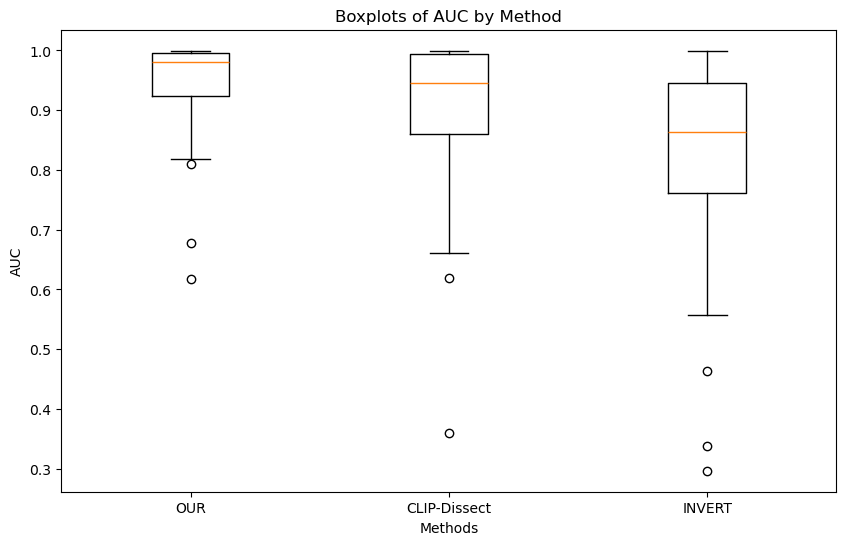

In [38]:
plot_boxplots(results_places, "AUC")

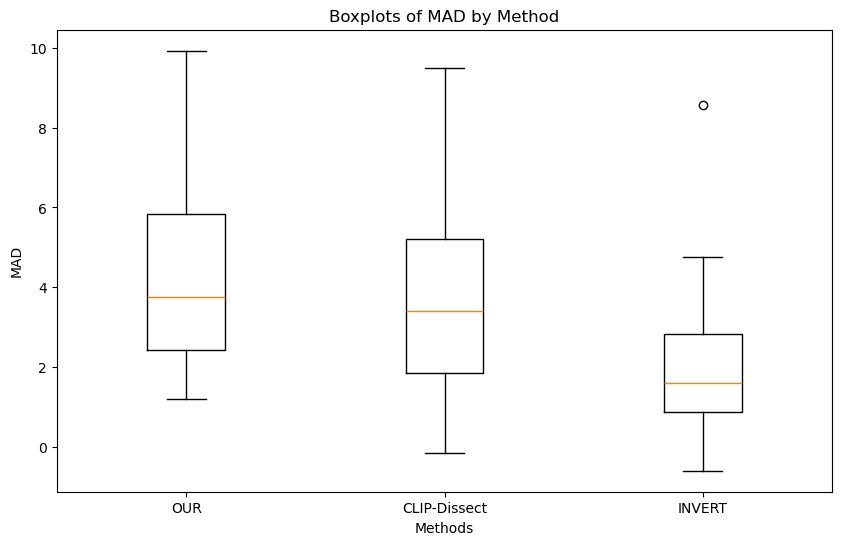

In [39]:
plot_boxplots(results_places, "MAD")

In [40]:
calculate_results_statistics(results_places, "AUC")

=== OUR ===
AUC: 0.935 +- 0.096
=== CLIP-Dissect ===
AUC: 0.886 +- 0.15
=== INVERT ===
AUC: 0.813 +- 0.186


In [41]:
calculate_results_statistics(results_places, "MAD")

=== OUR ===
MAD: 4.194 +- 2.253
=== CLIP-Dissect ===
MAD: 3.528 +- 2.321
=== INVERT ===
MAD: 1.971 +- 1.833


In [42]:
is_stat_sign(results_places, "OUR", "CLIP-Dissect", "AUC")
is_stat_sign(results_places, "OUR", "INVERT", "AUC")

<function wilcoxon at 0x17867c180>
=== OUR vs CLIP-Dissect ===
Unsignificant, p_value: 0.09261734149401615
<function wilcoxon at 0x17867c180>
=== OUR vs INVERT ===
Significant, p_value: 0.00011058151721954346


In [43]:
is_stat_sign(results_places, "OUR", "CLIP-Dissect", "MAD")
is_stat_sign(results_places, "OUR", "INVERT", "MAD")

<function ttest_rel at 0x178606840>
=== OUR vs CLIP-Dissect ===
Unsignificant, p_value: 0.23711676289287661
<function ttest_rel at 0x178606840>
=== OUR vs INVERT ===
Significant, p_value: 2.3607414012992996e-05


# ResNet50 ImageNet1k

In [44]:
METHODS = ("OUR", "CLIP-Dissect", "INVERT")
path = "cosy_evaluations/resnet50/evaluation_{method}_resnet50-avgpool.csv"
results = {
    method: pd.read_csv(path.format(method=method)) for method in METHODS
}

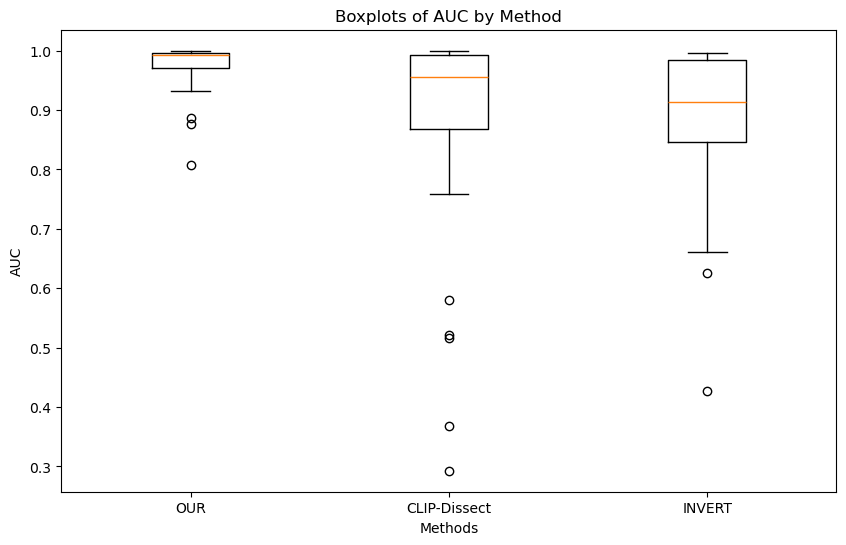

In [45]:
plot_boxplots(results, "AUC")

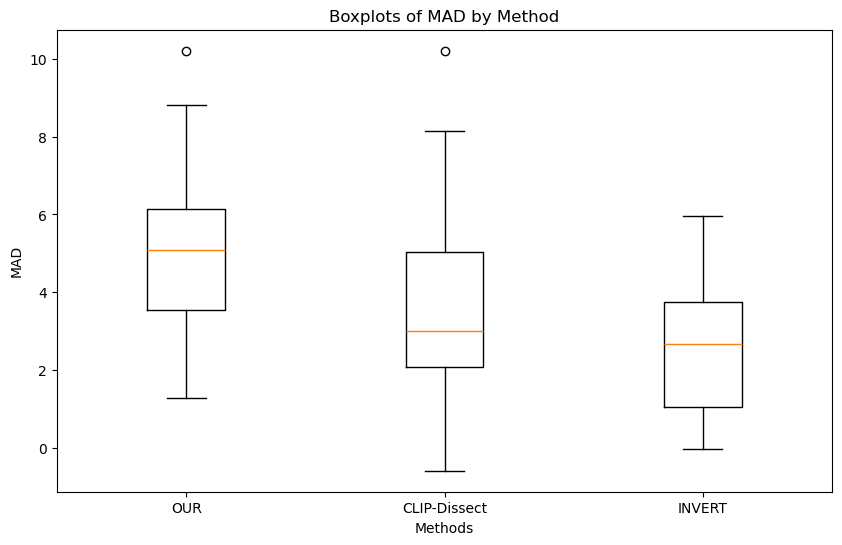

In [46]:
plot_boxplots(results, "MAD")

In [47]:
calculate_results_statistics(results, "AUC")

=== OUR ===
AUC: 0.973 +- 0.044
=== CLIP-Dissect ===
AUC: 0.867 +- 0.201
=== INVERT ===
AUC: 0.883 +- 0.136


In [48]:
calculate_results_statistics(results, "MAD")

=== OUR ===
MAD: 5.098 +- 2.161
=== CLIP-Dissect ===
MAD: 3.589 +- 2.609
=== INVERT ===
MAD: 2.533 +- 1.672


In [49]:
is_stat_sign(results, "OUR", "CLIP-Dissect", "AUC")
is_stat_sign(results, "OUR", "INVERT", "AUC")

<function wilcoxon at 0x17867c180>
=== OUR vs CLIP-Dissect ===
Significant, p_value: 0.014828434876012375
<function wilcoxon at 0x17867c180>
=== OUR vs INVERT ===
Significant, p_value: 6.286613643169403e-05


In [50]:
is_stat_sign(results, "OUR", "CLIP-Dissect", "MAD")
is_stat_sign(results, "OUR", "INVERT", "MAD")

<function ttest_rel at 0x178606840>
=== OUR vs CLIP-Dissect ===
Significant, p_value: 0.005083279708660139
<function ttest_rel at 0x178606840>
=== OUR vs INVERT ===
Significant, p_value: 1.8575224801470272e-06
